In [32]:
import os
import sys

# Add the path which contains wrappers for II harwares
sys.path.append(r'.\Hardware_src') # Make the change according to your path
import json
# Python modules for figure visualization
import numpy as np
import matplotlib.pyplot as plt
from helper import check_minmax
from IPython.display import clear_output
from IPython.display import display, HTML

In [33]:
from camera import Camera
# Instantiate Camera object
c = Camera()
c.open()
c.initialize_memory()

Load uc480 library..
ThorCam opened successfully.


In [17]:
c.get_properties()

Exposure 	 10.00  ms
Exposure Range 	 [0.01, 999.97]  ms
Framerate 	 1.0
Frame Range 	 [0.5, 17.3]
Pixel Clock 	 24 MHz
Allowed Pixel Clock 	 [7, 86] MHz


In [18]:
c.set_exposure(10)

# Check current exposure
c.get_exposure()

9.999750247413404

In [19]:
c.set_pixel_clock(7)

# Check the pixel clock
c.get_pixel_clock()

7

In [20]:
# Set the imaging ROI (in raw measurement view)
roi_shape = [100,100] # ROI size MUST BE MULTIPLE OF 4
roi_pos = [950,450] # The location of top-left corner of AOI on axis 0 and 1;
                     # Full size is (1280,1024)
c.set_roi(roi_shape, roi_pos)

# Lens cap on

In [21]:
img = {}
step = int(120/15)
max_exp = 120
for value in range(1, max_exp, step): #changing exposure value
    c.set_exposure(value)
    exposure_img = []
    print('Start capturing for exposure ' + str(value))
    for j in range(100): #looping for a hundred images
        temp = c.capture().copy()
        exposure_img.append(temp)
    print('Capturing done')
    exposure_img = np.array(exposure_img)
    img[value] = exposure_img

Start capturing for exposure 1
Capturing done
Start capturing for exposure 9
Capturing done
Start capturing for exposure 17
Capturing done
Start capturing for exposure 25
Capturing done
Start capturing for exposure 33
Capturing done
Start capturing for exposure 41
Capturing done
Start capturing for exposure 49
Capturing done
Start capturing for exposure 57
Capturing done
Start capturing for exposure 65
Capturing done
Start capturing for exposure 73
Capturing done
Start capturing for exposure 81
Capturing done
Start capturing for exposure 89
Capturing done
Start capturing for exposure 97
Capturing done
Start capturing for exposure 105
Capturing done
Start capturing for exposure 113
Capturing done


In [22]:
import pickle
with open('p2_aoi3_data.json', 'wb') as fp: #storing the images as json
    pickle.dump(img, fp)   

    

# Display the full-field image

# Load saved dictionary for the ensemble
# For each exposure time compute the mean & variance of all the images stacked in np array
# Plot the exposure time vs offset & variance noise 



In [34]:
# Capture & save the full field image measurements
# Reset the ROI
# Set the imaging ROI (in raw measurement view)
roi_shape = [1280,1024] # ROI size MUST BE MULTIPLE OF 4
roi_pos = [0,0] # The location of top-left corner of AOI on axis 0 and 1;
                     # Full size is (1280,1024)
c.set_roi(roi_shape, roi_pos)

# Set exposure
c.set_exposure(25)

# Capture 100 images
full_img = []
print('Start capturing for exposure ' + str(value))
for j in range(60): #looping for a hundred images
    temp = c.capture().copy()
    full_img.append(temp)
print('Capturing done')
full_img = np.array(full_img)

Start capturing for exposure 113
Capturing done


In [35]:
# Get the offset & noise images
with open('full_img_part_2.npy', 'wb') as f:
    np.save(f, full_img)

In [36]:
full_img.shape
full_noise.shape

NameError: name 'full_noise' is not defined

ThorCam closed successfully.


Exception ignored in: <function Camera.__del__ at 0x00000219EC820D08>
Traceback (most recent call last):
  File ".\Hardware_src\camera.py", line 352, in __del__
    self.close()
  File ".\Hardware_src\camera.py", line 176, in close
    self.call('is_ExitCamera', self.hid, argtypes=[c_int])
  File ".\Hardware_src\camera.py", line 192, in call
    assrt(func(*args), function)
  File ".\Hardware_src\camera.py", line 91, in assrt
    raise uc480Error(retVal, "Error: uc480 function call failed! Error code = " + str(retVal), fname)
camera.uc480Error: Error: uc480 function call failed! Error code = 1 in function is_ExitCamera
Exception ignored in: <function Camera.__del__ at 0x00000219EC820D08>
Traceback (most recent call last):
  File ".\Hardware_src\camera.py", line 352, in __del__
    self.close()
  File ".\Hardware_src\camera.py", line 173, in close
    if self.meminfo != None:
AttributeError: 'Camera' object has no attribute 'meminfo'
Exception ignored in: <function Camera.__del__ at 0x0

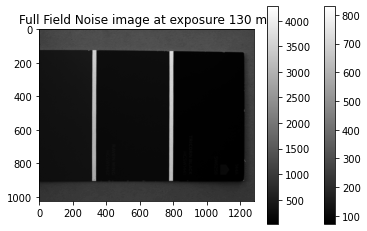

In [37]:
# Compute the offset & noise image
full_offset = np.mean(full_img, axis=0)
full_noise = np.var(full_img, axis=0)

# Visualize your offset image
im = plt.imshow(full_offset, cmap='gray')
color = plt.colorbar(im)
plt.title('Full Field Offset image at exposure 130 ms')
plt.savefig('full_offset.jpg')

# Visualize your offset image
im = plt.imshow(full_noise, cmap='gray')
color = plt.colorbar(im)
plt.title('Full Field Noise image at exposure 130 ms')
plt.savefig('full_noise.jpg')

In [38]:
# Compute mean offset & mean readout noise for each exposure time
offset_arr = []
readout_arr = []

for exposure_val in img:
    exp_imgs = img[exposure_val]
    curr_mean = np.mean(exp_imgs)
    curr_var = np.var(exp_imgs)
    offset_arr.append(curr_mean)
    readout_arr.append(curr_var)

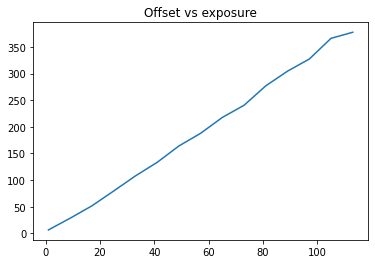

In [40]:
plt.plot(list(img.keys()), offset_arr, label="Offset")
plt.title('Offset vs exposure')
plt.show()


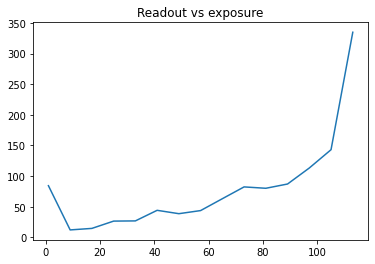

In [39]:
plt.plot(list(img.keys()), readout_arr, label="Readout")
plt.title('Readout vs exposure')
plt.show()


In [24]:
with open('class1_data.json', 'rb') as fp: #storing the images as json
    ensemble = pickle.load(fp)

In [30]:
print(list(img.keys()))

[1, 7, 13, 19, 25, 31, 37, 43, 49, 55, 61, 67, 73, 79, 85, 91, 97, 103, 109, 115]


In [31]:
print(list(ensemble.keys()))

[1, 7, 13, 19, 25, 31, 37, 43, 49, 55, 61, 67, 73, 79, 85, 91, 97, 103, 109, 115]


In [41]:
c.close()

uc480Error: Error: uc480 function call failed! Error code = 1 in function is_ExitCamera